<a href="https://colab.research.google.com/github/SohamSharangpani/ML/blob/master/Lab/ML_08_07092020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 8

## Classification of imagenet data using Neural network models

Dataset : Indian elephants, African elephants and Tuskers from imagenet

http://image-net.org/synset?wnid=n02504013

http://image-net.org/synset?wnid=n02504458

http://image-net.org/synset?wnid=n01871265

### Importing Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import os

from bs4 import BeautifulSoup
import requests
import cv2
import urllib

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from PIL import Image
from scipy import misc
import random 
import shutil
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

### Downloading data sets

In [ ]:
IE_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")
print(IE_page.content)
IE_soup = BeautifulSoup(IE_page.content, 'html.parser')

AE_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")
print(AE_page.content)
AE_soup = BeautifulSoup(AE_page.content, 'html.parser')

TU_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")
print(TU_page.content)
TU_soup = BeautifulSoup(TU_page.content, 'html.parser')

b"http://farm3.static.flickr.com/2394/2235169574_a573a0a0e1.jpg\r\nhttp://www.kohchang.se/elephanttrekking/elephas-maximus.jpg\r\nhttp://static.flickr.com/166/430524556_8d625a0c53.jpg\r\nhttp://farm1.static.flickr.com/34/65351417_9be3421342.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://static.flickr.com/7/10556049_dbbb080a01.jpg\r\nhttp://content.answers.com/main/content/wp/en-commons/thumb/1/19/200px-Borneo-elephant-PLoS_Biology.jpg\r\nhttp://farm1.static.flickr.com/166/413202515_d7db2babf4.jpg\r\nhttp://farm1.static.flickr.com/36/117884234_911615dd80.jpg\r\nhttp://farm2.static.flickr.com/1345/1410282114_6cb715cd27.jpg\r\nhttp://beta.wwf.it/UserFiles/Image/wwfcanon/_animali/58714.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Lightmatter_elephanttrunk.jpg/220px-Lightmatter_elephanttrunk.jpg\r\nhttp://static.flickr.com/98/385373846_76b82f230f.jpg\r\nhttp://farm1.static.flickr.com/118/297995324_906a19a127.jpg\r\nhttp://farm1.static.flickr.

### Pre-processing

In [ ]:
IE_str_soup=str(IE_soup)
type(IE_str_soup)
IE_split_urls=IE_str_soup.split('\r\n')
print(len(IE_split_urls))

AE_str_soup=str(AE_soup)
type(AE_str_soup)
AE_split_urls=AE_str_soup.split('\r\n')
print(len(AE_split_urls))

TU_str_soup=str(TU_soup)
type(TU_str_soup)
TU_split_urls=TU_str_soup.split('\r\n')
print(len(TU_split_urls))

1650
2278
1065


In [ ]:
!mkdir /content/IEAETU_train/ 

!mkdir /content/IEAETU_val/

!mkdir /content/IEAETU_test/ 

img_rows, img_cols = 64, 64 
input_shape = (img_rows, img_cols, 3)

In [ ]:
def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image

Taking train:validate :: 2:1 ; validate:test :: 1:1

taking 150 examples in train validate set

In [ ]:
n_of_training_images=150

for progress in range(n_of_training_images):
 
    if(progress%10==0):
        print(progress)
    if not IE_split_urls[progress] == None:
      try:
        I = url_to_image(IE_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_train/IE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):
 
    if(progress%10==0):
        print(progress)
    if not AE_split_urls[progress] == None:
      try:
        I = url_to_image(AE_split_urls[progress])
        if (len(I.shape))==3:
          save_path = '/content/IEAETU_train/AE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):
 
    if(progress%10==0):
        print(progress)
    if not TU_split_urls[progress] == None:
      try:
        I = url_to_image(TU_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_train/TU.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
10
20
30
40
50
60
70
80
90
100
110
120
130
140


In [ ]:
n_of_val_images=50

for progress in range(100,150):
 
    if(progress%10==0):
        print(progress)
    if not IE_split_urls[progress] == None:
      try:
        I = url_to_image(IE_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_val/IE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(100,150):
 
    if(progress%10==0):
        print(progress)
    if not AE_split_urls[progress] == None:
      try:
        I = url_to_image(AE_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_val/AE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(100,150):
 
    if(progress%10==0):
        print(progress)
    if not TU_split_urls[progress] == None:
      try:
        I = url_to_image(TU_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/IEAETU_val/TU.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None



In [ ]:
n_of_test_images=50

for progress in range(150,200):
 
    if(progress%10==0):
        print(progress)
    if not IE_split_urls[progress] == None:
      try:
        I = url_to_image(IE_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_test/IE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(150,200):
 
    if(progress%10==0):
        print(progress)
    if not AE_split_urls[progress] == None:
      try:
        I = url_to_image(AE_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IEAETU_test/AE.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(150,200):
 
    if(progress%10==0):
        print(progress)
    if not TU_split_urls[progress] == None:
      try:
        I = url_to_image(TU_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/IEAETU_test/TU.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None



150
160
170
180
190
150
160
170
180
190
150
160
170
180
190


### To check images

In [ ]:
def plot_pixel_distribution(img_file):
  img = cv2.imread(img_file)

  fig = plt.figure(figsize=(16,8))

  fig.add_subplot(1,2,1)
  plt.title("Image")
  plt.imshow(img)
  plt.xticks(np.array([]))
  plt.yticks(np.array([]))

  fig.add_subplot(1,2,2)
  plt.title("Histogram")
  plt.hist(img.flatten())

  plt.show()

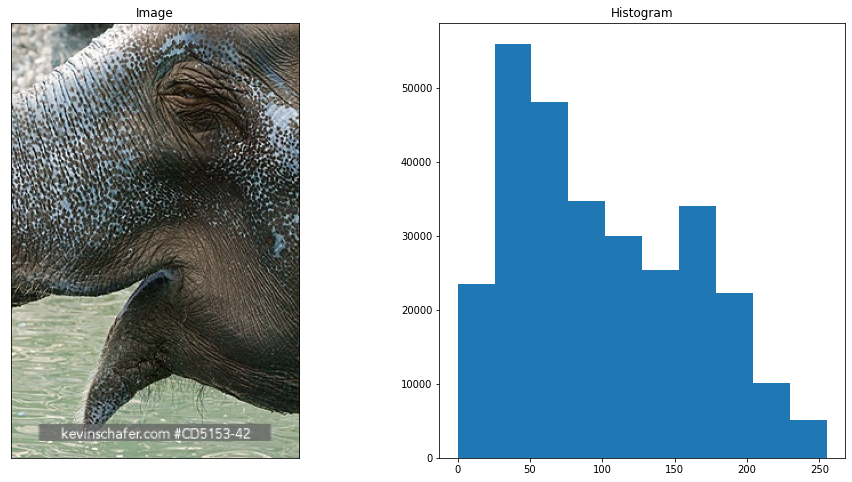

In [ ]:
plot_pixel_distribution('/content/IEAETU_train/IE.45.jpg')

In [ ]:
train_data = '/content/IEAETU_train'
 
filenames = os.listdir(train_data)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IE':
        categories.append('0')
    elif category == 'AE':
        categories.append('1')
    else:
        categories.append('2')

train = pd.DataFrame({'filename':filenames,'label':categories})

train.to_csv("train.csv",index=False)

In [ ]:
val = '/content/IEAETU_val'
 
filenames = os.listdir(val)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IE':
        categories.append('0')
    elif category == 'AE':
        categories.append('1')
    else:
        categories.append('2')

val = pd.DataFrame({'filename':filenames,'label':categories})

val.to_csv("val.csv",index=False)

In [ ]:
test_data = '/content/IEAETU_test'
 
filenames = os.listdir(test_data)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IE':
        categories.append('0')
    elif category == 'AE':
        categories.append('1')
    else:
        categories.append('2')

test = pd.DataFrame({'filename':filenames,'label':categories})

test.to_csv("test.csv",index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90,
        validation_split=0.33)






train_generator = datagen.flow_from_dataframe(dataframe=train, directory=train_data,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7)
 
validation_generator = datagen.flow_from_dataframe(dataframe=train, directory=train_data,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="/content/IEAETU_test",
x_col="filename",
y_col=None,
batch_size=10,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

Found 188 validated image filenames belonging to 3 classes.
Found 92 validated image filenames belonging to 3 classes.
Found 104 validated image filenames.


In [ ]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size



model = Sequential()
model.add(Conv2D(512, (150, 150), padding="valid", activation="relu", input_shape=(150, 150, 3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100, callbacks=[es, mc])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2.4831 - accuracy: 0.2921
Epoch 00001: val_accuracy improved from -inf to 0.24444, saving model to best_model.h5
18/18 [==============================] - 12s 662ms/step - loss: 2.4831 - accuracy: 0.2921 - val_loss: 1.1162 - val_accuracy: 0.2444
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1.0908 - accuracy: 0.3539
Epoch 00002: val_accuracy improved from 0.24444 to 0.41111, saving model to best_model.h5
18/18 [==============================] - 12s 661ms/step - loss: 1.0908 - accuracy: 0.3539 - val_loss: 1.0903 - val_accuracy: 0.4111
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.3820
Epoch 00003: val_accuracy improved from 0.41111 to 0.42222, saving model to best_model.h5
18/18 [==============================] - 12s 653ms/step - loss: 1.0929 - accuracy: 0.3820 - val_loss: 1.0975 - val_accuracy: 0.4222
Epoch 4/100
18/18 [==============================] -

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)
print(pred)

Instructions for updating:
Please use Model.predict, which supports generators.
[[0.27089936 0.3423793  0.38672134]
 [0.15976745 0.5274056  0.3128269 ]
 [0.19774616 0.45898008 0.34327382]
 [0.23733027 0.39395335 0.36871633]
 [0.1896175  0.47272786 0.33765462]
 [0.23715477 0.39311174 0.3697335 ]
 [0.14730138 0.55232096 0.30037767]
 [0.2177262  0.42471465 0.35755908]
 [0.21452081 0.4299968  0.35548243]
 [0.20427552 0.44777155 0.34795296]
 [0.21536914 0.42801085 0.35661998]
 [0.18892372 0.47447774 0.33659855]
 [0.20919003 0.43952966 0.35128036]
 [0.285065   0.3236401  0.3912949 ]
 [0.26785263 0.34660202 0.38554537]
 [0.18441215 0.48163578 0.33395207]
 [0.17662786 0.4967545  0.32661757]
 [0.10114245 0.6538646  0.24499293]
 [0.1919545  0.46918508 0.33886045]
 [0.17488642 0.49901453 0.32609895]
 [0.24583648 0.37917486 0.37498868]
 [0.22290437 0.4161578  0.36093774]
 [0.14201534 0.562625   0.2953597 ]
 [0.14939003 0.5488788  0.30173117]
 [0.23375195 0.3991043  0.3671437 ]
 [0.19098438 0.47005

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
y = pd.read_csv('test.csv')
y_test = y['label']

### Plots

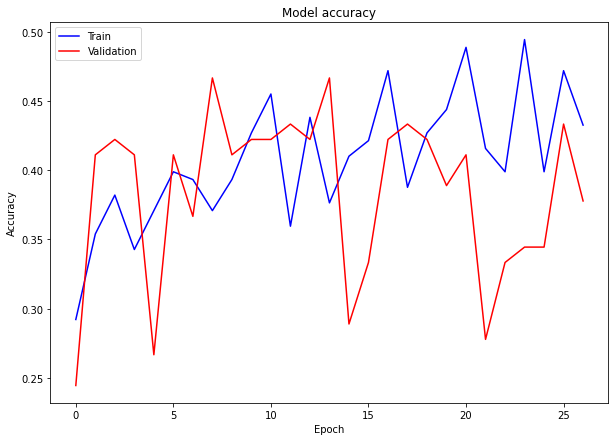

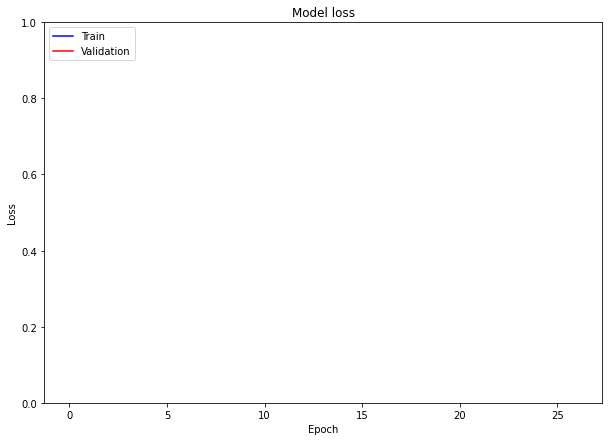

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Parameters 